In [2]:
import sys
import h5py
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import lzma
import pickle
import tifffile

In [2]:
# img = readh5("../../../datasets/cremi/sample_A_20160501.hdf", "volumes/labels/neuron_ids")
f = h5py.File("/home/suryakalia/documents/summer/datasets/cremi/sample_A_20160501.hdf", 'r')
# f = h5py.File("/home/suryakalia/documents/summer/tests/hanyu_analysis/p105.h5", 'r')


In [11]:
neuron_ids = np.array(f["volumes/labels/neuron_ids"])

In [12]:
clefts = np.array(f["volumes/labels/clefts"])

In [3]:
raw = np.array(f["volumes/raw"])

In [6]:
with lzma.open("/home/suryakalia/documents/summer/datasets/cremi_clean/webknossos_upload/raw.xz" , "wb") as f:
      pickle.dump(raw, f)

In [8]:
with lzma.open("/home/suryakalia/documents/summer/datasets/cremi_clean/webknossos_upload/clean_clefts.xz", "rb") as f:
  clefts = pickle.load(f)

In [13]:
neuron_ids.shape

(100, 1000, 1000)

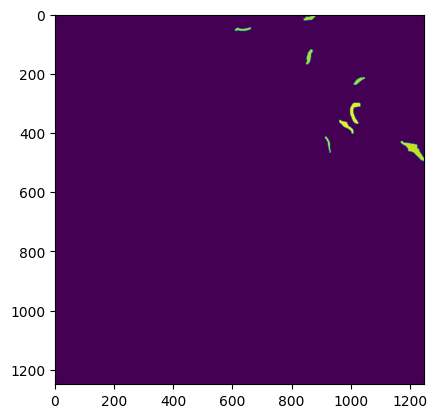

In [9]:
plt.imshow(clefts[0,:,:])

In [ ]:
neuron_ids[100,1150:1200,1190:1200]

In [15]:
neuron_ids.max()

16035567

In [16]:
neuron_ids.min()

0

In [17]:
(unique, counts) =  np.unique(neuron_ids, return_counts=True)

In [24]:
unique

array([       0,  1586679,  1881841, ..., 16035565, 16035566, 16035567],
      dtype=uint32)

In [19]:
counts

array([40839456,   940517, 18114416, ...,        1,       11,        1])

In [20]:
counts.argmin()

40

In [42]:
print(unique[2], counts[2])

1881841 18114416


In [47]:
clipped_neuron_ids = np.where(neuron_ids == 1586679 , 1, 0)

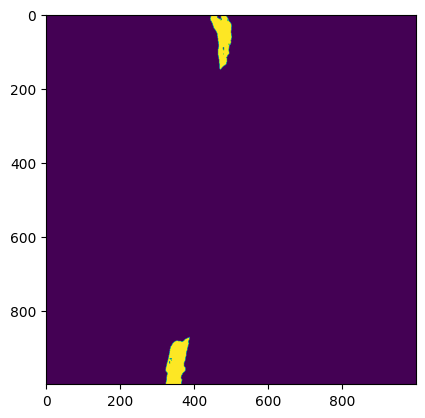

In [51]:
plt.imshow(clipped_neuron_ids[0,:,:])

In [48]:
layer_sum = np.sum(clipped_neuron_ids, axis=(1,2))
print(layer_sum.shape)
print(layer_sum)
print(layer_sum.argmax())

(100,)
[10126 12899 15805 18417 20552 22145 23726 25038 26636 27788 29379 30478
 30810 30620 31075 30643 29428 27463 25708 25219 23376 23193 23721 23960
 24412 24000 22833 21197 20189 18926 17190 15009 12541 10094  8214  6467
  4765  3291  2767  2602  2722  2668  2511  2363  2284  2072  1646  1024
   671   626   579   706   870  1039  1289  1640  1871  2023  2523  2828
  3018  3246  3466  3707  3863  4034  3952  3946  4220  4250  4193  4070
  3864  3856  3776  3896  3682  3042  2760  2539  2307  2105  1931  1774
  1639  1487  1431  1433  1380  1314  1261  1232  1245  1266  1267  1329
  1413  1537  1565  1564]
14


In [33]:
np.sort(counts)[::-1][:6100]

array([40839456, 18114416,   940517, ...,       50,       50,       50])

In [73]:
np.sort(counts)[27000]


37

In [46]:
print([key for key, val in enumerate(counts) if val == 940517])

[1]


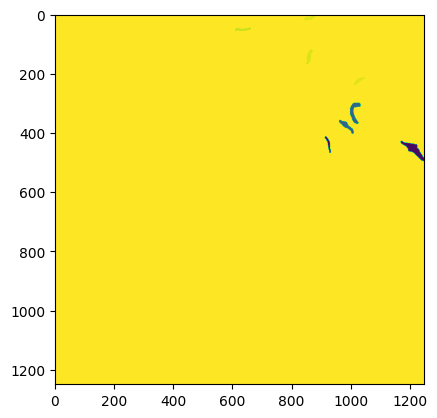

In [10]:
plt.imshow(clefts[0,:,:])

In [12]:
crop = clefts[0,350:400,980:1020]
crop[crop == 18446744073709551615] = 0
np.set_printoptions(threshold=sys.maxsize)
print(crop)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0 858 858 858 858 858 858 858 858 858 858 858 858   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0 858 858 858 858 858 858 858 858 858 858 858 858   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0 858 858 858 858 858 858 858 858 858 858 858 858   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0 858 858 858 858 858 858 858 858 858 858 858 858 858
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0 858 858 858 858 858 858 858 858 858 858 858 858 858
  858   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0 858 858 858 858 858 858 858 858 858 858 858 858
  858 858   0   0

In [3]:
image = tifffile.imread('/home/suryakalia/documents/summer/datasets/cremi_clean/result_A_components.tiff')

In [4]:
image.shape

(125, 1250, 1250)

In [ ]:
with lzma.open('/home/suryakalia/documents/summer/datasets/cremi_clean/result_A_components.xz', "wb") as f:
      pickle.dump(image, f)